In [2]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")

#from SCCAF import *
# import scvi

from glob import iglob
from tqdm import tqdm
import scanpy as sc

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.grid'] = False

In [4]:
def cluster_small_multiples(
    adata, clust_key, frameon=False, legend_loc=None, **kwargs
):
    tmp = adata.copy()

    for i, clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype("category")
        try:
            tmp.uns[clust + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]
        except:
            pass

    sc.pl.umap(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color= adata.obs[clust_key].cat.categories.tolist(),
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs,
    )

# Read in

In [4]:
ad=sc.read("data/franjic_2021/soupx/SRR16928876_GSM5687879_HSB231_EC/matrix.mtx")

In [5]:
ad.X

<36601x12605 sparse matrix of type '<class 'numpy.float32'>'
	with 17410138 stored elements in Compressed Sparse Row format>

In [6]:
ad.X.T

<12605x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 17410138 stored elements in Compressed Sparse Column format>

In [7]:
ad.X.data

array([0.96880597, 0.9822239 , 0.99041134, ..., 0.75843203, 0.9918976 ,
       0.7947341 ], dtype=float32)

In [8]:
import pandas as pd

In [27]:
var=pd.read_csv("data/franjic_2021/soupx/SRR16928876_GSM5687879_HSB231_EC/genes.tsv",sep='\t',header=None,index_col=0)

In [29]:
var=pd.DataFrame(list(var.index))
var.columns=['genes']
var.index=list(var['genes'])
var

,genes
MIR1302-2HG,MIR1302-2HG
FAM138A,FAM138A
OR4F5,OR4F5
AL627309.1,AL627309.1
AL627309.3,AL627309.3
...,...
AC141272.1,AC141272.1
AC023491.2,AC023491.2
AC007325.1,AC007325.1
AC007325.4,AC007325.4


In [15]:
obs=pd.read_csv("data/franjic_2021/soupx/SRR16928876_GSM5687879_HSB231_EC/barcodes.tsv",header=None,index_col=0)

In [30]:
obs=pd.DataFrame(list(obs.index))
obs.columns=['barcodes']
obs.index=list(obs['barcodes'])
obs

,barcodes
AAACCCAAGGCGTTAG-1,AAACCCAAGGCGTTAG-1
AAACCCAAGGTCCGAA-1,AAACCCAAGGTCCGAA-1
AAACCCAAGTACCCTA-1,AAACCCAAGTACCCTA-1
AAACCCAAGTACGTCT-1,AAACCCAAGTACGTCT-1
AAACCCAAGTTCACTG-1,AAACCCAAGTTCACTG-1
...,...
TTTGTTGGTCACCCTT-1,TTTGTTGGTCACCCTT-1
TTTGTTGGTGCAGTGA-1,TTTGTTGGTGCAGTGA-1
TTTGTTGGTGCATACT-1,TTTGTTGGTGCATACT-1
TTTGTTGGTTTGCCGG-1,TTTGTTGGTTTGCCGG-1


In [17]:
from scipy.sparse import csr_matrix

In [32]:
ad1=sc.AnnData(X=csr_matrix(ad.X.T),obs=obs,var=var)

In [33]:
ad1.obs_names

Index(['AAACCCAAGGCGTTAG-1', 'AAACCCAAGGTCCGAA-1', 'AAACCCAAGTACCCTA-1',
       'AAACCCAAGTACGTCT-1', 'AAACCCAAGTTCACTG-1', 'AAACCCACAGAATTCC-1',
       'AAACCCACAGAGCTAG-1', 'AAACCCACAGTTCCAA-1', 'AAACCCACAGTTGCGC-1',
       'AAACCCAGTAGGAGGG-1',
       ...
       'TTTGTTGAGGTTCACT-1', 'TTTGTTGCAAACCATC-1', 'TTTGTTGCATAGAATG-1',
       'TTTGTTGGTAGGTGCA-1', 'TTTGTTGGTATCTCGA-1', 'TTTGTTGGTCACCCTT-1',
       'TTTGTTGGTGCAGTGA-1', 'TTTGTTGGTGCATACT-1', 'TTTGTTGGTTTGCCGG-1',
       'TTTGTTGTCTCTAAGG-1'],
      dtype='object', length=12605)

In [34]:
ad1.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1',
       ...
       'AC133551.1', 'AC136612.1', 'AC136616.1', 'AC136616.3', 'AC136616.2',
       'AC141272.1', 'AC023491.2', 'AC007325.1', 'AC007325.4', 'AC007325.2'],
      dtype='object', length=36601)

In [35]:
text = """
SRR16928876_GSM5687879_HSB231_EC SRR16928886_GSM5687889_HSB628_EC SRR16928896_GSM5687899_HSB179_6_DG SRR16928906_GSM5687909_HSB282_2_DG
SRR16928877_GSM5687880_HSB231_SUB SRR16928887_GSM5687890_HSB628_SUB SRR16928897_GSM5687900_HSB179_7_DG SRR16928907_GSM5687910_HSB282_3_DG
SRR16928878_GSM5687881_HSB231_DG SRR16928888_GSM5687891_HSB628_CA1 SRR16928898_GSM5687901_HSB181_1_DG SRR16928908_GSM5687911_HSB282_4_DG
SRR16928879_GSM5687882_HSB231_CA1 SRR16928889_GSM5687892_HSB628_CA2-4 SRR16928899_GSM5687902_HSB181_2_DG SRR16928909_GSM5687912_HSB282_5_DG
SRR16928880_GSM5687883_HSB231_CA2-4 SRR16928890_GSM5687893_HSB628_DG SRR16928900_GSM5687903_HSB181_3_DG SRR16928910_GSM5687913_HSB282_6_DG
SRR16928881_GSM5687884_HSB237_CA1 SRR16928891_GSM5687894_HSB179_1_DG SRR16928901_GSM5687904_HSB181_4_DG SRR16928911_GSM5687914_HSB282_7_DG
SRR16928882_GSM5687885_HSB237_CA2-4 SRR16928892_GSM5687895_HSB179_2_DG SRR16928902_GSM5687905_HSB181_5_DG SRR16928912_GSM5687915_HSB282_8_DG
SRR16928883_GSM5687886_HSB237_DG SRR16928893_GSM5687896_HSB179_3_DG SRR16928903_GSM5687906_HSB181_6_DG
SRR16928884_GSM5687887_HSB237_EC SRR16928894_GSM5687897_HSB179_4_DG SRR16928904_GSM5687907_HSB181_7_DG
SRR16928885_GSM5687888_HSB237_SUB SRR16928895_GSM5687898_HSB179_5_DG SRR16928905_GSM5687908_HSB282_1_DG
"""

# Split the text by any whitespace and filter out any empty strings
sample_list = [item for item in text.split() if item]

# Print the list to verify
print(sample_list)

['SRR16928876_GSM5687879_HSB231_EC', 'SRR16928886_GSM5687889_HSB628_EC', 'SRR16928896_GSM5687899_HSB179_6_DG', 'SRR16928906_GSM5687909_HSB282_2_DG', 'SRR16928877_GSM5687880_HSB231_SUB', 'SRR16928887_GSM5687890_HSB628_SUB', 'SRR16928897_GSM5687900_HSB179_7_DG', 'SRR16928907_GSM5687910_HSB282_3_DG', 'SRR16928878_GSM5687881_HSB231_DG', 'SRR16928888_GSM5687891_HSB628_CA1', 'SRR16928898_GSM5687901_HSB181_1_DG', 'SRR16928908_GSM5687911_HSB282_4_DG', 'SRR16928879_GSM5687882_HSB231_CA1', 'SRR16928889_GSM5687892_HSB628_CA2-4', 'SRR16928899_GSM5687902_HSB181_2_DG', 'SRR16928909_GSM5687912_HSB282_5_DG', 'SRR16928880_GSM5687883_HSB231_CA2-4', 'SRR16928890_GSM5687893_HSB628_DG', 'SRR16928900_GSM5687903_HSB181_3_DG', 'SRR16928910_GSM5687913_HSB282_6_DG', 'SRR16928881_GSM5687884_HSB237_CA1', 'SRR16928891_GSM5687894_HSB179_1_DG', 'SRR16928901_GSM5687904_HSB181_4_DG', 'SRR16928911_GSM5687914_HSB282_7_DG', 'SRR16928882_GSM5687885_HSB237_CA2-4', 'SRR16928892_GSM5687895_HSB179_2_DG', 'SRR16928902_GSM56879

In [36]:
len(sample_list)

37

In [41]:
for i in sample_list:
    print(i[23:])

HSB231_EC
HSB628_EC
HSB179_6_DG
HSB282_2_DG
HSB231_SUB
HSB628_SUB
HSB179_7_DG
HSB282_3_DG
HSB231_DG
HSB628_CA1
HSB181_1_DG
HSB282_4_DG
HSB231_CA1
HSB628_CA2-4
HSB181_2_DG
HSB282_5_DG
HSB231_CA2-4
HSB628_DG
HSB181_3_DG
HSB282_6_DG
HSB237_CA1
HSB179_1_DG
HSB181_4_DG
HSB282_7_DG
HSB237_CA2-4
HSB179_2_DG
HSB181_5_DG
HSB282_8_DG
HSB237_DG
HSB179_3_DG
HSB181_6_DG
HSB237_EC
HSB179_4_DG
HSB181_7_DG
HSB237_SUB
HSB179_5_DG
HSB282_1_DG


In [39]:
len('SRR16928876_GSM5687879_')

23

In [42]:
list(ad1.obs_names[:10])+

['AAACCCAAGGCGTTAG-1',
 'AAACCCAAGGTCCGAA-1',
 'AAACCCAAGTACCCTA-1',
 'AAACCCAAGTACGTCT-1',
 'AAACCCAAGTTCACTG-1',
 'AAACCCACAGAATTCC-1',
 'AAACCCACAGAGCTAG-1',
 'AAACCCACAGTTCCAA-1',
 'AAACCCACAGTTGCGC-1',
 'AAACCCAGTAGGAGGG-1']

In [44]:
pd.DataFrame([i[23:]+j for j in obs.index])

,0
0,HSB282_1_DGAAACCCAAGGCGTTAG-1
1,HSB282_1_DGAAACCCAAGGTCCGAA-1
2,HSB282_1_DGAAACCCAAGTACCCTA-1
3,HSB282_1_DGAAACCCAAGTACGTCT-1
4,HSB282_1_DGAAACCCAAGTTCACTG-1
...,...
12600,HSB282_1_DGTTTGTTGGTCACCCTT-1
12601,HSB282_1_DGTTTGTTGGTGCAGTGA-1
12602,HSB282_1_DGTTTGTTGGTGCATACT-1
12603,HSB282_1_DGTTTGTTGGTTTGCCGG-1


In [103]:
ads={}
for i in sample_list:
    pre=sampleMap[i[23:]]
    try:
        ad=sc.read(f"data/franjic_2021/soupx/{i}/matrix.mtx")
        var=pd.read_csv(f"data/franjic_2021/soupx/{i}/genes.tsv",sep='\t',header=None,index_col=0)
        obs=pd.read_csv(f"data/franjic_2021/soupx/{i}/barcodes.tsv",header=None,index_col=0)
        
        var=pd.DataFrame(list(var.index))
        var.columns=['genes']
        var.index=list(var['genes'])
        obs=pd.DataFrame([pre+'_'+j for j in obs.index])
        obs.columns=['barcodes']
        obs.index=list(obs['barcodes'])
        obs
        ad1=sc.AnnData(X=csr_matrix(ad.X.T),obs=obs,var=var)
        ads[pre]=ad1
    except:
        print(i)

SRR16928899_GSM5687902_HSB181_2_DG


In [104]:
len(ads)

36

In [105]:
ad=list(ads.values())

In [106]:
ad=ad[0].concatenate(ad[1:],join='outer')

In [107]:
ad

AnnData object with n_obs × n_vars = 231973 × 36601
    obs: 'barcodes', 'batch'
    var: 'genes'

In [108]:
ad.X.data

array([0.8560873 , 0.9026685 , 0.9267649 , ..., 0.        , 0.13952044,
       4.362139  ], dtype=float32)

In [109]:
ad.obs

,barcodes,batch
HSB231_1_EC_AAACCCAAGGCGTTAG-1-0,HSB231_1_EC_AAACCCAAGGCGTTAG-1,0
HSB231_1_EC_AAACCCAAGGTCCGAA-1-0,HSB231_1_EC_AAACCCAAGGTCCGAA-1,0
HSB231_1_EC_AAACCCAAGTACCCTA-1-0,HSB231_1_EC_AAACCCAAGTACCCTA-1,0
HSB231_1_EC_AAACCCAAGTACGTCT-1-0,HSB231_1_EC_AAACCCAAGTACGTCT-1,0
HSB231_1_EC_AAACCCAAGTTCACTG-1-0,HSB231_1_EC_AAACCCAAGTTCACTG-1,0
...,...,...
HSB282_1_DG_TTTGGTTGTGGGCTCT-1-35,HSB282_1_DG_TTTGGTTGTGGGCTCT-1,35
HSB282_1_DG_TTTGGTTGTTATTCTC-1-35,HSB282_1_DG_TTTGGTTGTTATTCTC-1,35
HSB282_1_DG_TTTGGTTTCATACAGC-1-35,HSB282_1_DG_TTTGGTTTCATACAGC-1,35
HSB282_1_DG_TTTGTTGAGAGGATCC-1-35,HSB282_1_DG_TTTGTTGAGAGGATCC-1,35


In [110]:
ad.write_h5ad('data/franjic_2021/soupx_merge.h5ad')

In [13]:
adata=sc.read('data/results/hm3f1a_hip_integration_palantir_Franjic_scv.h5ad')

In [14]:
adata

AnnData object with n_obs × n_vars = 49926 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'samplename', 'region', 'cluster', 'batch', 'sampleID', 'cellType', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'n_genes', 'barcode', 'sample', 're_barcode', 'ori_barcode', 're_sample', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'state', 'n_counts', 'velocity_self_transition'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'neighbors', 'pca', 'state_colors', 'velocity_graph', 'velocity_graph_neg', 'velocity_param

In [116]:
ad.obs_names=[i[0] for i in pd.Series(ad.obs_names).str.split('-')]

In [119]:
ad1=ad[ad.obs_names.isin(adata.obs_names),:].copy()

In [120]:
adata=adata[ad1.obs_names]

In [124]:
adata

View of AnnData object with n_obs × n_vars = 40097 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'samplename', 'region', 'cluster', 'batch', 'sampleID', 'cellType', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'n_genes', 'barcode', 'sample', 're_barcode', 'ori_barcode', 're_sample', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'state', 'n_counts', 'velocity_self_transition'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'neighbors', 'pca', 'state_colors', 'velocity_graph', 'velocity_graph_neg', 'veloci

In [127]:
ad1.obs=adata.obs

In [129]:
adata.obsm.keys()

KeysView(AxisArraysView with keys: X_diffmap, X_draw_graph_fa, X_palantir_diff_comp, X_palantir_multiscale, X_pca, X_pca_harmony, X_tsne, X_umap, velocity_draw_graph_fa)

In [132]:
for i in adata.obsm.keys():
    ad1.obsm[i]=adata.obsm[i]

In [138]:
ad1.write_h5ad('data/franjic_2021/soupx_merge_with_anno.h5ad')

In [136]:
genes=['MKI67','TOP2A','HMGB2','PBK','UBE2C','RRM2','CDCA3','CCNA2','FAM64A','TPX2']
genes = [i for i in genes if i in ad.var_names]

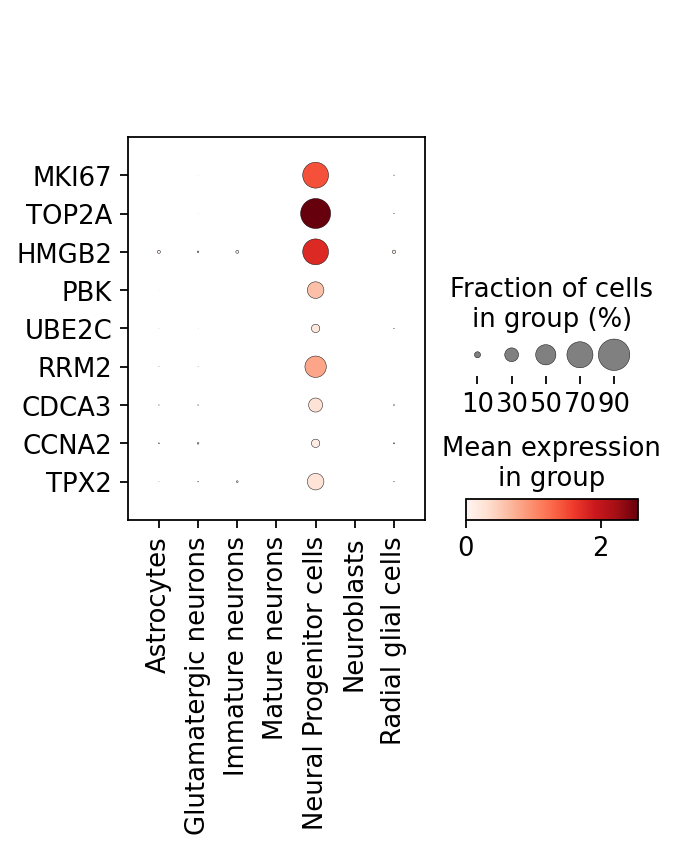

In [141]:
sc.pl.dotplot(ad1,genes,'state',swap_axes=True)

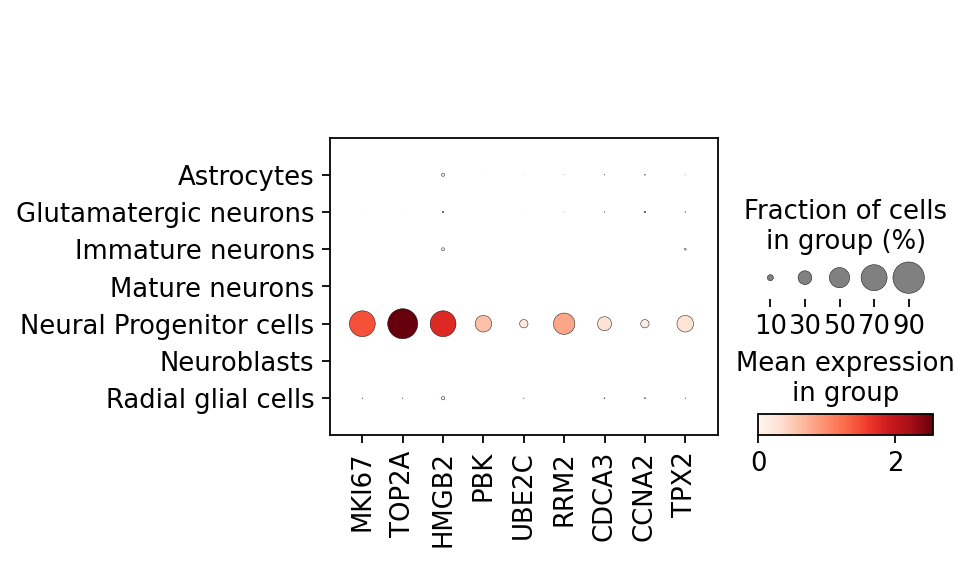

In [140]:
sc.pl.dotplot(ad1,genes,'state')

In [101]:
sampleMap=dict(zip(org,new))

In [102]:
sampleMap

{'HSB179_1_DG': 'HSB179_1_eDG',
 'HSB179_2_DG': 'HSB179_2_eDG',
 'HSB179_3_DG': 'HSB179_3_eDG',
 'HSB179_4_DG': 'HSB179_4_eDG',
 'HSB179_5_DG': 'HSB179_5_eDG',
 'HSB179_6_DG': 'HSB179_6_eDG',
 'HSB179_7_DG': 'HSB179_7_eDG',
 'HSB181_1_DG': 'HSB181_1_DG',
 'HSB181_2_DG': 'HSB181_2_DG',
 'HSB181_3_DG': 'HSB181_3_DG',
 'HSB181_4_DG': 'HSB181_4_DG',
 'HSB181_5_DG': 'HSB181_5_DG',
 'HSB181_6_DG': 'HSB181_6_DG',
 'HSB181_7_DG': 'HSB181_7_DG',
 'HSB231_CA1': 'HSB231_1_CA1',
 'HSB231_CA2-4': 'HSB231_1_CA24',
 'HSB231_DG': 'HSB231_1_DG',
 'HSB231_EC': 'HSB231_1_EC',
 'HSB231_SUB': 'HSB231_1_SUB',
 'HSB237_CA1': 'HSB237_1_CA1',
 'HSB237_CA2-4': 'HSB237_1_CA24',
 'HSB237_DG': 'HSB237_1_DG',
 'HSB237_EC': 'HSB237_1_EC',
 'HSB237_SUB': 'HSB237_1_SUB',
 'HSB282_1_DG': 'HSB282_1_DG',
 'HSB282_2_DG': 'HSB282_2_DG',
 'HSB282_3_DG': 'HSB282_3_DG',
 'HSB282_4_DG': 'HSB282_4_DG',
 'HSB282_5_DG': 'HSB282_5_DG',
 'HSB282_6_DG': 'HSB282_6_DG',
 'HSB282_7_DG': 'HSB282_7_DG',
 'HSB282_8_DG': 'HSB282_8_DG',
 'H

In [98]:
org=['HSB179_1_DG',
 'HSB179_2_DG',
 'HSB179_3_DG',
 'HSB179_4_DG',
 'HSB179_5_DG',
 'HSB179_6_DG',
 'HSB179_7_DG',
 'HSB181_1_DG',
 'HSB181_2_DG',
 'HSB181_3_DG',
 'HSB181_4_DG',
 'HSB181_5_DG',
 'HSB181_6_DG',
 'HSB181_7_DG',
 'HSB231_CA1',
 'HSB231_CA2-4',
 'HSB231_DG',
 'HSB231_EC',
 'HSB231_SUB',
 'HSB237_CA1',
 'HSB237_CA2-4',
 'HSB237_DG',
 'HSB237_EC',
 'HSB237_SUB',
 'HSB282_1_DG',
 'HSB282_2_DG',
 'HSB282_3_DG',
 'HSB282_4_DG',
 'HSB282_5_DG',
 'HSB282_6_DG',
 'HSB282_7_DG',
 'HSB282_8_DG',
 'HSB628_CA1',
 'HSB628_CA2-4',
 'HSB628_DG',
 'HSB628_EC',
 'HSB628_SUB']

In [85]:
set(sampleMap.values())

{'HSB179_1_eDG',
 'HSB179_2_eDG',
 'HSB179_3_eDG',
 'HSB179_4_eDG',
 'HSB179_5_eDG',
 'HSB179_6_eDG',
 'HSB179_7_eDG',
 'HSB181_1_DG',
 'HSB181_2_DG',
 'HSB181_3_DG',
 'HSB181_4_DG',
 'HSB181_5_DG',
 'HSB181_6_DG',
 'HSB181_7_DG',
 'HSB231_1_CA1',
 'HSB231_1_CA24',
 'HSB231_1_DG',
 'HSB231_1_EC',
 'HSB231_1_SUB',
 'HSB237_1_CA1',
 'HSB237_1_CA24',
 'HSB237_1_DG',
 'HSB237_1_EC',
 'HSB237_1_SUB',
 'HSB282_1_DG',
 'HSB282_2_DG',
 'HSB282_3_DG',
 'HSB282_4_DG',
 'HSB282_5_DG',
 'HSB282_6_DG',
 'HSB282_7_DG',
 'HSB282_8_DG',
 'HSB628_1_CA1',
 'HSB628_1_CA24',
 'HSB628_1_DG',
 'HSB628_1_EC',
 'HSB628_1_SUB'}

In [99]:
new=['HSB179_1_eDG',
 'HSB179_2_eDG',
 'HSB179_3_eDG',
 'HSB179_4_eDG',
 'HSB179_5_eDG',
 'HSB179_6_eDG',
 'HSB179_7_eDG',
 'HSB181_1_DG',
 'HSB181_2_DG',
 'HSB181_3_DG',
 'HSB181_4_DG',
 'HSB181_5_DG',
 'HSB181_6_DG',
 'HSB181_7_DG',
 'HSB231_1_CA1',
 'HSB231_1_CA24',
 'HSB231_1_DG',
 'HSB231_1_EC',
 'HSB231_1_SUB',
 'HSB237_1_CA1',
 'HSB237_1_CA24',
 'HSB237_1_DG',
 'HSB237_1_EC',
 'HSB237_1_SUB',
 'HSB282_1_DG',
 'HSB282_2_DG',
 'HSB282_3_DG',
 'HSB282_4_DG',
 'HSB282_5_DG',
 'HSB282_6_DG',
 'HSB282_7_DG',
 'HSB282_8_DG',
 'HSB628_1_CA1',
 'HSB628_1_CA24',
 'HSB628_1_DG',
 'HSB628_1_EC',
 'HSB628_1_SUB']

# Before SoupX

In [15]:
adata=sc.read('data/results/hm3f1a_hip_integration_palantir_Franjic_scv.h5ad')

In [16]:
adata.obs

,nCount_RNA,nFeature_RNA,percent.mt,samplename,region,cluster,batch,sampleID,cellType,n_genes_by_counts,...,sample,re_barcode,ori_barcode,re_sample,initial_size_unspliced,initial_size_spliced,initial_size,state,n_counts,velocity_self_transition
re_barcode,,,,,,,,,,,,,,,,,,,,,
HSB179_1_eDG_TCCTCTTGTCCTGTCT,60044,9053,0.011658,HSB179,DG,CA3 CFAP299 SYN3,0,HSB179_1,Unknown,9053,...,HSB179_1_eDG,HSB179_1_eDG_TCCTCTTGTCCTGTCT,HSB179_1_eDG_TCCTCTTGTCCTGTCT-0,HSB179_1_eDG,38705,6835,6835.0,Glutamatergic neurons,6324.066895,0.038825
HSB179_1_eDG_AAACCCACATCTTAGG,20932,5326,0.014332,HSB179,DG,DG GC PROX1 SGCZ,0,HSB179_1,Unknown,5326,...,HSB179_1_eDG,HSB179_1_eDG_AAACCCACATCTTAGG,HSB179_1_eDG_AAACCCACATCTTAGG-0,HSB179_1_eDG,13227,2351,2351.0,Glutamatergic neurons,6417.919434,0.085020
HSB179_1_eDG_AAAGGGCAGAGCCGTA,10724,4275,0.111899,HSB179,DG,DG GC PROX1 SGCZ,0,HSB179_1,Unknown,4275,...,HSB179_1_eDG,HSB179_1_eDG_AAAGGGCAGAGCCGTA,HSB179_1_eDG_AAAGGGCAGAGCCGTA-0,HSB179_1_eDG,5484,2232,2232.0,Glutamatergic neurons,3458.978516,0.067995
HSB179_1_eDG_AAAGGGCGTGTGCCTG,13130,4622,0.015232,HSB179,DG,DG GC PROX1 SGCZ,0,HSB179_1,Unknown,4622,...,HSB179_1_eDG,HSB179_1_eDG_AAAGGGCGTGTGCCTG,HSB179_1_eDG_AAAGGGCGTGTGCCTG-0,HSB179_1_eDG,7674,1593,1593.0,Glutamatergic neurons,5928.196289,0.091342
HSB179_1_eDG_AAAGGGCTCGCTGATA,14608,4726,0.054765,HSB179,DG,DG GC PROX1 SGCZ,0,HSB179_1,Unknown,4726,...,HSB179_1_eDG,HSB179_1_eDG_AAAGGGCTCGCTGATA,HSB179_1_eDG_AAAGGGCTCGCTGATA-0,HSB179_1_eDG,8482,1909,1909.0,Glutamatergic neurons,5510.529785,0.101769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSB628_1_EC_TTTCGATCAACCGTAT,6086,2664,0.509366,HSB628,EC,Astro AQP4 CHRDL1,24,HSB628_1,Unknown,2664,...,HSB628_1_EC,HSB628_1_EC_TTTCGATCAACCGTAT,HSB628_1_EC_TTTCGATCAACCGTAT-24,HSB628_1_EC,3329,1341,1341.0,Astrocytes,3267.042480,0.219885
HSB628_1_EC_TTTGACTTCGCCAACG,4595,2290,0.478781,HSB628,EC,Astro AQP4 CHRDL1,24,HSB628_1,Unknown,2290,...,HSB628_1_EC,HSB628_1_EC_TTTGACTTCGCCAACG,HSB628_1_EC_TTTGACTTCGCCAACG-24,HSB628_1_EC,2500,1122,1122.0,Astrocytes,2948.335449,0.186984
HSB628_1_EC_TTTGACTTCTTGGTGA,3253,1727,0.215186,HSB628,EC,Astro AQP4 CHRDL1,24,HSB628_1,Unknown,1727,...,HSB628_1_EC,HSB628_1_EC_TTTGACTTCTTGGTGA,HSB628_1_EC_TTTGACTTCTTGGTGA-24,HSB628_1_EC,1849,652,652.0,Astrocytes,3583.054932,0.292155


In [17]:
ad2=sc.read('data/results/hm3f1a_hip_integration_palantir_Franjic.h5ad')

In [20]:
ad2.obs=adata.o

In [21]:
ad2.obs

,nCount_RNA,nFeature_RNA,percent.mt,samplename,region,cluster,batch,sampleID,cellType,n_genes_by_counts,...,sample,re_barcode,ori_barcode,re_sample,initial_size_unspliced,initial_size_spliced,initial_size,state,n_counts,velocity_self_transition
re_barcode,,,,,,,,,,,,,,,,,,,,,
HSB179_1_eDG_TCCTCTTGTCCTGTCT,60044,9053,0.011658,HSB179,DG,CA3 CFAP299 SYN3,0,HSB179_1,Unknown,9053,...,HSB179_1_eDG,HSB179_1_eDG_TCCTCTTGTCCTGTCT,HSB179_1_eDG_TCCTCTTGTCCTGTCT-0,HSB179_1_eDG,38705,6835,6835.0,Glutamatergic neurons,6324.066895,0.038825
HSB179_1_eDG_AAACCCACATCTTAGG,20932,5326,0.014332,HSB179,DG,DG GC PROX1 SGCZ,0,HSB179_1,Unknown,5326,...,HSB179_1_eDG,HSB179_1_eDG_AAACCCACATCTTAGG,HSB179_1_eDG_AAACCCACATCTTAGG-0,HSB179_1_eDG,13227,2351,2351.0,Glutamatergic neurons,6417.919434,0.085020
HSB179_1_eDG_AAAGGGCAGAGCCGTA,10724,4275,0.111899,HSB179,DG,DG GC PROX1 SGCZ,0,HSB179_1,Unknown,4275,...,HSB179_1_eDG,HSB179_1_eDG_AAAGGGCAGAGCCGTA,HSB179_1_eDG_AAAGGGCAGAGCCGTA-0,HSB179_1_eDG,5484,2232,2232.0,Glutamatergic neurons,3458.978516,0.067995
HSB179_1_eDG_AAAGGGCGTGTGCCTG,13130,4622,0.015232,HSB179,DG,DG GC PROX1 SGCZ,0,HSB179_1,Unknown,4622,...,HSB179_1_eDG,HSB179_1_eDG_AAAGGGCGTGTGCCTG,HSB179_1_eDG_AAAGGGCGTGTGCCTG-0,HSB179_1_eDG,7674,1593,1593.0,Glutamatergic neurons,5928.196289,0.091342
HSB179_1_eDG_AAAGGGCTCGCTGATA,14608,4726,0.054765,HSB179,DG,DG GC PROX1 SGCZ,0,HSB179_1,Unknown,4726,...,HSB179_1_eDG,HSB179_1_eDG_AAAGGGCTCGCTGATA,HSB179_1_eDG_AAAGGGCTCGCTGATA-0,HSB179_1_eDG,8482,1909,1909.0,Glutamatergic neurons,5510.529785,0.101769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSB628_1_EC_TTTCGATCAACCGTAT,6086,2664,0.509366,HSB628,EC,Astro AQP4 CHRDL1,24,HSB628_1,Unknown,2664,...,HSB628_1_EC,HSB628_1_EC_TTTCGATCAACCGTAT,HSB628_1_EC_TTTCGATCAACCGTAT-24,HSB628_1_EC,3329,1341,1341.0,Astrocytes,3267.042480,0.219885
HSB628_1_EC_TTTGACTTCGCCAACG,4595,2290,0.478781,HSB628,EC,Astro AQP4 CHRDL1,24,HSB628_1,Unknown,2290,...,HSB628_1_EC,HSB628_1_EC_TTTGACTTCGCCAACG,HSB628_1_EC_TTTGACTTCGCCAACG-24,HSB628_1_EC,2500,1122,1122.0,Astrocytes,2948.335449,0.186984
HSB628_1_EC_TTTGACTTCTTGGTGA,3253,1727,0.215186,HSB628,EC,Astro AQP4 CHRDL1,24,HSB628_1,Unknown,1727,...,HSB628_1_EC,HSB628_1_EC_TTTGACTTCTTGGTGA,HSB628_1_EC_TTTGACTTCTTGGTGA-24,HSB628_1_EC,1849,652,652.0,Astrocytes,3583.054932,0.292155


In [23]:
genes=['MKI67','TOP2A','HMGB2','PBK','UBE2C','RRM2','CDCA3','CCNA2','FAM64A','TPX2']
genes = [i for i in genes if i in ad2.var_names]

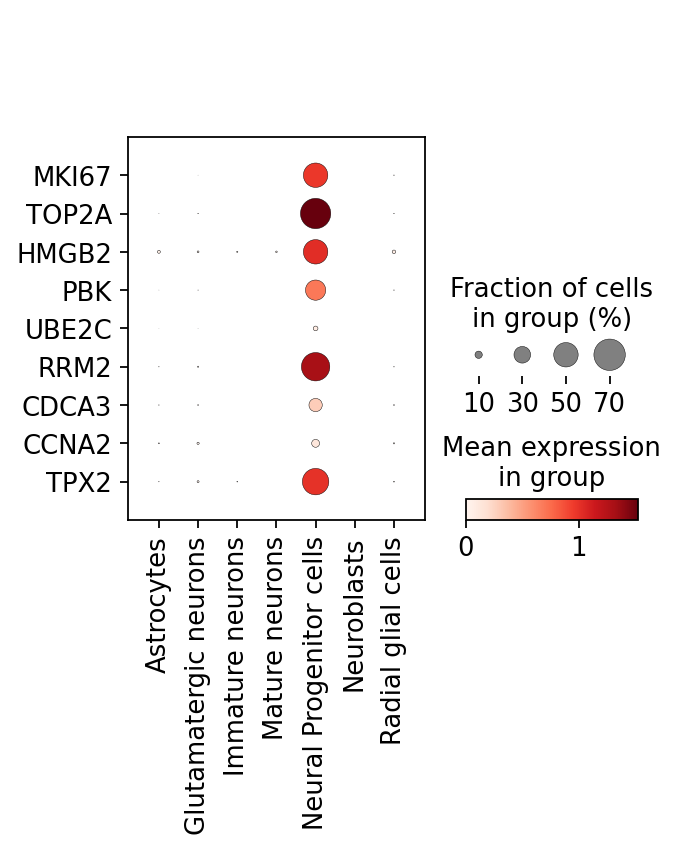

In [24]:
sc.pl.dotplot(ad2,genes,'state',swap_axes=True)